# 1. Метод Ньютона

**Постановка задачи:**

Приближенно найти корни уравнения $f(x)=0$

Один из методов решения - метод Ньютона, частный случай метода простой итерации.

**Метод простой итерации:**

Имеем начальное приближение к корню $x^{(0)}$. Нужно решить уравнение $f(x_*)=0$. Перепишем данное уравнение в виде $x_*=g(x_*)$, где $g(x_*)$ - некоторая функция. Самый простой выбор: $g(x)=x-\alpha(x) f(x)$. 

**Суть метода:**

Имеем начальное приближение к корню $x^{(0)}$, на каждом шаге $n$ получаем новое приближение к корню в виде $x^{(n)}=g(x^{(n-1)}$.

Если существует предел $\lim_{n\rightarrow \infty} x^{(n)} = x_*$, тогда $f(x_*)=0$.

Метод сходится, если в некоторой окрестности корня $|g'(x)|\le q<1$. В данном случае сходиость линейная с показателем геометрической прогрессии $q$.

**Пример для $\alpha(x)=1$:**

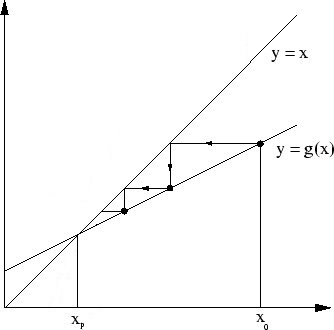

**Можно ускорить сходимость метода простой итерации, если положить $\alpha=\frac{2}{m+M}$**, где  $0<m\le f'(x) \le M$ в некоторой окрестности корня $x_*$. 

Скорость сходимости зависит от $|g'(x)|\le q = max(|1-\alpha m|, |1-\alpha M|)1$. Наилучшее $\alpha=\frac{2}{m+M}$ и $q=\frac{M-m}{M+m}$.

**Метод Ньютона:**

$\alpha(x)=1/f'(x)$

**Суть метода:**

Уравнение касательной к функции $f(x)$ в точке $x^{(n)}$:

$y=(x-x^{(n)})f'(x^{(n)})+f(x^{(n)})$

Когда касательная пересекает ось $x$: 

$0=(x-x^{(n)})f'(x^{(n)})+f(x^{(n)})$, 

$x=x^{(n)}-\frac{f(x^{(n)})}{f'(x^{(n)})}$




**Сходимость метода - квадратичная** 

Пусть $x_*$ - простой корень.

Введем $\delta_{n}=x^{(n)}-x_*$

$f(x)=f(x_*)+\frac{df}{dx}(x-x_*)+\frac{1}{2}\frac{d^2f}{dx^2}(x-x_*)^2+\frac{1}{6}\frac{d^3f}{dx^3}(x-x_*)^3+...$
$f'(x)=\frac{df}{dx}(x_*)+\frac{d^2f}{dx^2}(x-x_*)+\frac{1}{2}\frac{d^3f}{dx^3}(x-x_*)^2+...$

$\delta_{n+1}=\delta_{n}-\frac{f(x^{(n)})}{f'(x^{(n)})}=\delta_{n}-\delta_{n}\frac{0+\frac{df}{dx}\delta_{n}+\frac{1}{2}\frac{d^2f}{dx^2}\delta_{n}^2+...}{\frac{df}{dx}(x_*)+\frac{d^2f}{dx^2}\delta_{n}+...}\sim \delta_{n}^2\frac{f''}{2f'}$

**В случае кратного корня сходимость линейная, однако можно модифицировать метод и восстановить квадратичную сходимость**

Пусть $x_*$ - корень кратности $m$, т.е. $\frac{d^{n}f}{dx^{n}}=0$ $\forall n < m$. Модифицируем итерационный процесс:

$x^{(n+1)}=x^{(n)}-m\frac{f(x^{(n)})}{f'(x^{(n)})}$


Снова рассмотрим $\delta_{n+1}$:

$\delta_{n+1}=\delta_{n}-\frac{f(x^{(n)})}{f'(x^{(n)})}=\delta_{n}-m\frac{f^{(m)}\frac{\delta_n^m}{m!}+f^{(m+1)}\frac{\delta_n^{m+1}}{(m+1)!}+...}{f^{(m)}\frac{\delta_n^{m-1}}{(m-1)!}+f^{(m+1)}\frac{\delta_n^m}{m!}+...}\sim \delta_n^2\frac{f^{(m+1)}}{(m+1)f^{(m)}}$

**Недостатки метода Ньютона**

1. Только локальная сходимость. Т.е. если начальное приближение задано очень далеко от корня, то процесс может не сойтись.
Пример: $f(x)=x^{3}-2x+2$, $x_0=0$ (метод применим и для комплексной переменной).
2. Нет оценки на интервал, в котором заключен корень (в отличие от бисекций).
3. Нужно рассчитывать производную.

Во многих практических приложениях последнее невозможно напрямую, поэтому используется разностная аппроксимаци производной:

$x^{(n+1)}=x^{(n)}-\frac{f(x^{(n)})(x^{(n)}-x^{(n-1)})}{f(x^{(n)})-f(x^{(n-1)})}$

**Когда нужно прерывать процесс?**

Апостериорная оценка точности: $|x^{(n)}-x^{(n-1)}|<\varepsilon$ и $|f(x^{(n)})|<\varepsilon_2$

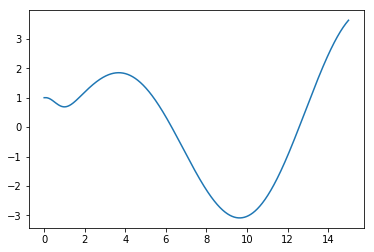

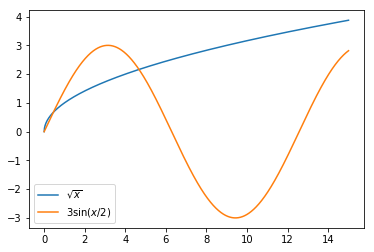

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import newton

x=np.linspace(0,15,1000)

f0 = lambda x: np.cosh(x)*np.exp(-2*x**2)+np.sqrt(x)*np.sin(x/2)
f1 = lambda x: np.cosh(x)*np.exp(-2*x**2)+np.sqrt(x)*np.sin(x)
f2 = lambda x: np.sqrt(x)
f3 = lambda x: 3*np.sin(x/2)

y0=f0(x)
y1=f1(x)
y2=f2(x)
y3=f3(x)

plt.figure()
plt.plot(x,y0)

plt.figure()
plt.plot(x,y2,label=r"$\sqrt{x}$")
plt.plot(x,y3,label=r"$3\sin(x/2)$")
plt.legend()
plt.show()

**Фракталы Ньютона**

Снова рассмотрим алгоритм для поиска корней функции комплексной переменной:

$z^{(n+1)}=z^{(n)}-m\frac{f(z^{(n)})}{f'(z^{(n)})}$

Рассмотрим $f(z)=z^5-1$. Имеем 5 корней: $z_j=\exp(2i\pi j/5)$.

В зависимости от начального приближения будем получать различные корни.

**Что требуется в задании?**

Решить уравнение методом Ньютона и отобразить на плоскости $Re(z)-Im(z)$ начальные приближение. Точки должны быть сгруппированы по цветам, в зависимости от корня, к которому сошелся метод.

In [114]:
roots=np.exp(np.arange(0,5)*2*np.pi*1j/5)
initialReal=np.linspace(-2,2,100)
initialImag=np.linspace(-2,2,100)

XR,YR=np.meshgrid(initialReal,initialImag)
initial=XR+1j*YR
results=np.zeros_like(initial)

In [115]:
f = lambda x: x**5-1
df = lambda x: 5*x**4
ddf = lambda x: 20*x**3

In [116]:
for ind1 in range(np.size(initial,0)):
    for ind2 in range(np.size(initial,1)):
        results[ind1,ind2]=newton(f,initial[ind1,ind2],fprime=df,fprime2=ddf,maxiter=100)


initialReshaped=np.reshape(initial,len(initialReal)*len(initialImag))
iR=np.real(initialReshaped)
iI=np.imag(initialReshaped)

resReshaped=np.reshape(results,len(initialReal)*len(initialImag))
resGrouped=np.zeros_like(resReshaped,dtype=int)

for ind1 in range(len(initialReal)*len(initialImag)):
    for ind2 in range(5):
        if (np.abs(np.real(resReshaped[ind1]-roots[ind2]))<1e-5)&(np.abs(np.imag(resReshaped[ind1]-roots[ind2]))<1e-5):
            resGrouped[ind1]=ind2
            break

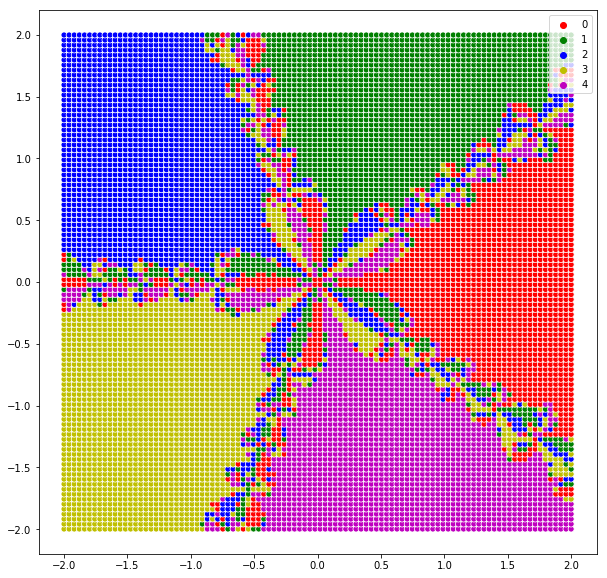

In [139]:
plt.figure(figsize=(10, 10))
#sns.scatterplot(x=iR, y=iI, hue=resGrouped)
sns.scatterplot(x=iR, y=iI, hue=resGrouped,palette=['r','g','b','y','m'])
plt.show()